<div style="background-color:#f9f9ff; border: 1.5px solid #ccc; border-radius: 12px; padding: 20px; color:#000000;">

<h2 style="color:#b30059;">🚗 Used Cars Price Analysis Project</h2>

This notebook presents a <strong>Exploratory Data Analysis (EDA)</strong>This end-to-end data analytics project uses a second-hand car dataset to extract meaningful insights that can help a company improve business decisions such as pricing, inventory sourcing, and target marketing using<strong> pandas, numpy and seaborn</strong> with Python.

📁 <strong>Data Table</strong>: <span style="color:#0074D9;">car detail.csv</span>

<em>Let’s decode the second hand car business in India with structured insights and sharp SQL logic</em>📊🧠

</div>


## 🧼 1. Data Cleaning & Preprocessing

- Handle missing values
- Convert string fields (`mileage`, `engine`, `max_power`) to numeric
- Extract relevant features from `name` (e.g., brand)
- Normalize categorical features

---

## 🔍 2. Exploratory Data Analysis (EDA) with Pandas

We'll create 10 insightful queries, such as:

1. 📊 Average selling price by brand  
2.⛽ Most common fuel type  
3. 🚗 Average mileage per transmission type  
4. 📉 Depreciation rate based on year  
5. 💰 Top 5 brands with highest average price  
6. 🔁 Correlation between kilometers driven and price  
7. 🪑 Most common number of seats  
8. 👤 Distribution of owners across price ranges  
9. ⚙️ Impact of engine size on price  
10. 🛣️ Mileage comparison between fuel types  

---

## 📈 3. Visualizations (5 Graphs)

1. 📊 **Bar Plot**: Average selling price per brand  
2. 🥧 **Pie Chart**: Distribution of fuel types  
3. 📉 **Line Plot**: Average


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Files

In [2]:
df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# 🧼 1. Data Cleaning & Preprocessing

In [3]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# checking for null values

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### ➡️ Splitting the name column to extract the brand and model name

In [5]:
# Split the name column into two parts: brand and the rest
df['brand'] = df['name'].apply(lambda x: x.split()[0])
df['model_name'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))


#### ➡️ This step will bring the brand and model_name column to the 0th and 1st index at axis 1

In [6]:
# Get all columns except brand and model_name
other_cols = [col for col in df.columns if col not in ['brand', 'model_name']]

# Reorder: brand, model_name, then the rest
df = df[['brand', 'model_name'] + other_cols]


# Filling Null Values

#### owner column
- Filling with "Not Available"

In [7]:

df['owner'] = df['owner'].fillna('Not Available')

#### mileage column
- Filling with the mean value and grouping the mean on the basis of brands

In [8]:

# the mileage column is having text at the end so replacing the text to calculating the mean     
df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '')

# converting the column to numeric to calculate the mean
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# calculating the mean grouping by the brand
df['mileage'] = df.groupby('brand')['mileage'].transform(lambda x: x.fillna(x.mean()))

#### engine column
- Filling values with the median

In [9]:

# the engine column is having text at the end so replacing the text to calculating the median
df['engine'] = df['engine'].astype(str).str.replace('CC', '', case=False).str.strip()

# converting the column to numeric to calculate the median
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

# calculating the median grouping by the brand
df['engine'] = df.groupby('brand')['engine'].transform(lambda x: x.fillna(x.median()))

C:\Users\nivya\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


#### max_power column
- Filling with median

In [10]:

# the max_power column is having text at the end so replacing the text to calculating the median
df['max_power'] = df['max_power'].astype(str).str.replace('bhp', '', case=False).str.strip()

# converting the column to numeric to calculate the median
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# calculating the median grouping by the brand
df['max_power'] = df.groupby('engine')['max_power'].transform(lambda x: x.fillna(x.median()))


#### toeque column
- Filling with "Unknown"

In [11]:

df['torque'] = df['torque'].fillna('Unknown')

#### seats column
- Filling with mode

In [12]:

df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

#### cheking for null values again after replacing the nulls

In [13]:
df.isnull().sum()

brand            0
model_name       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          1
engine           1
max_power        1
torque           0
seats            0
dtype: int64

#### renaming the columns

In [14]:
df.rename(columns={
    'mileage': 'mileage_in_kmpl',
    'engine': 'engine_in_CC',
    'max_power': 'max_power_bhp'
}, inplace=True)


#### creating useful columns

In [15]:

df['age'] = 2025 - df['year']
df['price_to_power'] = df['selling_price'] / df['max_power_bhp']
df['car_condition'] = df['year'].apply(
    lambda y: 'Old' if y < 2012 else ('Mid' if y <= 2020 else 'New')
)


In [16]:
df.columns

Index(['brand', 'model_name', 'name', 'year', 'selling_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner', 'mileage_in_kmpl',
       'engine_in_CC', 'max_power_bhp', 'torque', 'seats', 'age',
       'price_to_power', 'car_condition'],
      dtype='object')

# 🔍 2. Exploratory Data Analysis (EDA) with Pandas

### 1. Highest avg selling price by brand
- Helps identify which brands hold higher resale value, assisting in pricing and sourcing decisions.



In [99]:

avg_price_by_brand_df = (
    df.groupby('brand')['selling_price']
    .mean()
    .round(0)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
avg_price_by_brand_df

,brand,avg_selling_price
0,Lexus,5150000.0
1,BMW,4109917.0
2,Land,3608333.0
3,Volvo,3272015.0
4,Jaguar,2915465.0
5,Audi,2612200.0
6,Mercedes-Benz,2470444.0
7,Jeep,2149613.0
8,Isuzu,1942000.0
9,MG,1783333.0


### 2. Depreciation rate (price/age) by brand
- Reveals the dominant fuel preference in the market — useful for predicting demand and supply trends (e.g., petrol vs. diesel vs. electric).

In [100]:

df['age'] = 2025 - df['year']
dep_rate_by_brand_df = (
    df.groupby('brand')
    .apply(lambda g: g['selling_price'].mean() / g['age'].mean())
    .round(2)
    .reset_index(name='depreciation_rate')
    .sort_values(by='depreciation_rate', ascending=False)
)
dep_rate_by_brand_df

C:\Users\nivya\AppData\Local\Temp\ipykernel_4904\1486588738.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['selling_price'].mean() / g['age'].mean())


,brand,depreciation_rate
17,Lexus,858333.33
3,BMW,495668.34
31,Volvo,487166.67
16,Land,451041.67
13,Jaguar,352637.14
18,MG,314705.88
14,Jeep,289730.43
12,Isuzu,277428.57
15,Kia,273545.45
2,Audi,267232.73


### 3. Fuel distribution among top-25% priced cars
- Compares fuel efficiency between manual and automatic transmissions — useful for recommending efficient options.

In [101]:


df['is_top_25_price'] = df['selling_price'] >= df['selling_price'].quantile(0.75)
fuel_top_quartile_df = (
    pd.crosstab(df['fuel'], df['is_top_25_price'], normalize='index')
    .round(2)
    .reset_index()
    .rename(columns={False: 'not_top_25%', True: 'top_25%'})
)
fuel_top_quartile_df

is_top_25_price,fuel,not_top_25%,top_25%
0,CNG,1.00,0.00
1,Diesel,0.64,0.36
2,LPG,1.00,0.00
3,Petrol,0.88,0.12


### 4. Average Price by Transmission
- Shows how car prices decrease over time, helping forecast resale values and buying windows for used cars.

In [143]:

price_by_transmission_df = (
    df.groupby('transmission')['selling_price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
price_by_transmission_df

,transmission,avg_selling_price
0,Automatic,1870827.60
1,Manual,455425.86


### 5. Correlation Between Mileage and Price
- Highlights luxury or high-end brands, helping businesses target premium buyers and position inventory.

In [103]:

mileage_price_corr_df = pd.DataFrame({
    'correlation_mileage_vs_price': [round(df[['mileage_in_kmpl', 'selling_price']].corr().iloc[0, 1], 2)]
})
mileage_price_corr_df

,correlation_mileage_vs_price
0,-0.13


### 6. Best Price-to-Power Ratio by Fuel and Transmission
- Tests if higher mileage (wear) reduces car price — important for pricing models and condition evaluation.

In [104]:

df['price_to_power'] = df['selling_price'] / df['max_power_bhp']
ptp_by_fuel_trans_df = (
    df.groupby(['fuel', 'transmission'])['price_to_power']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='price_to_power')
)
ptp_by_fuel_trans_df

,fuel,transmission,price_to_power
3,LPG,Manual,3340.40
0,CNG,Manual,5065.28
4,Petrol,Automatic,8788.47
1,Diesel,Automatic,14503.14
2,Diesel,Manual,inf
5,Petrol,Manual,inf


### 7. Average Kilometers Driven by Car Condition
- Useful to identify customer preference (e.g., 5-seaters for families) and plan inventory accordingly.

In [105]:

km_by_condition_df = (
    df.groupby('car_condition')['km_driven']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'km_driven': 'avg_km_driven'})
)
km_by_condition_df

,car_condition,avg_km_driven
0,Mid,59529.15
1,Old,99954.50


### 8. Average Price by Seller Type
- Helps analyze how previous ownership (first, second, etc.) influences resale value and buyer perception.

In [106]:

price_by_seller_df = (
    df.groupby('seller_type')['selling_price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
price_by_seller_df

,seller_type,avg_selling_price
0,Dealer,1443493.75
1,Individual,498561.23
2,Trustmark Dealer,801838.98


### 9. Owner Category Counts
- Determines whether larger engines (more powerful cars) lead to higher prices — useful for marketing performance cars.

In [135]:

df['owner'] = df['owner'].fillna('Not Available')
owner_counts_df = (
    df['owner']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'owner_type', 0: 'count'})
)
owner_counts_df

,owner,count
0,First Owner,5289
1,Second Owner,2105
2,Third Owner,555
3,Fourth & Above Owner,174
4,Test Drive Car,5


### 10. Average Price by Seats
- Compares average mileage across petrol, diesel, CNG, and electric — helping promote fuel-efficient vehicles.

In [108]:

price_by_seats_df = (
    df.groupby('seats')['selling_price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
price_by_seats_df

,seats,avg_selling_price
0,2.0,700500.00
1,4.0,486764.66
2,5.0,616318.86
3,6.0,581596.77
4,7.0,812923.18
5,8.0,583711.83
6,9.0,500074.94
7,10.0,344105.11
8,14.0,235000.00


### 11. Popular Engine Bins
- Identifies the most listed or sold brand in the dataset — useful for marketing and stocking decisions.

In [110]:

bins = [0, 1000, 1500, 2000, 3000, 10000]
labels = ['<1000cc', '1000-1500cc', '1500-2000cc', '2000-3000cc', '>3000cc']
df['engine_bin'] = pd.cut(df['engine_in_CC'], bins=bins, labels=labels)
engine_bin_counts_df = (
    df['engine_bin']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'engine_range', 'engine_bin': 'count'})
)
engine_bin_counts_df

,count,count
0,<1000cc,1324
1,1000-1500cc,4709
2,1500-2000cc,854
3,2000-3000cc,1228
4,>3000cc,12


### 12. Yearly Average Selling Price
- Helps quantify how much resale value drops per ownership change — important for buyers seeking well-kept cars.

In [115]:

yearly_price_trend_df = (
    df.groupby('year')['selling_price']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
yearly_price_trend_df

,year,avg_selling_price
0,1983,300000.00
1,1991,55000.00
2,1994,88000.00
3,1995,107500.00
4,1996,81666.67
5,1997,90181.73
6,1998,73100.00
7,1999,75833.33
8,2000,93041.55
9,2001,48498.30


### 13. Rare Brand Prices
- Identifies the most valuable combinations (e.g., diesel + automatic), guiding sales and recommendations.

In [116]:

brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 50].index
rare_brand_prices_df = (
    df[df['brand'].isin(rare_brands)]
    .groupby('brand')['selling_price']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'selling_price': 'avg_selling_price'})
)
rare_brand_prices_df

,brand,avg_selling_price
0,Lexus,5150000.00
1,Land,3608333.33
2,Audi,2612199.92
3,Jeep,2149612.87
4,Isuzu,1942000.00
5,MG,1783333.33
6,Kia,1504500.00
7,Force,887500.00
8,Mitsubishi,817500.00
9,Ashok,300000.00


# 📈 3. Visualizations

#### Set style for all plots

In [122]:

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1. Average Selling Price by Brand (Top 10)

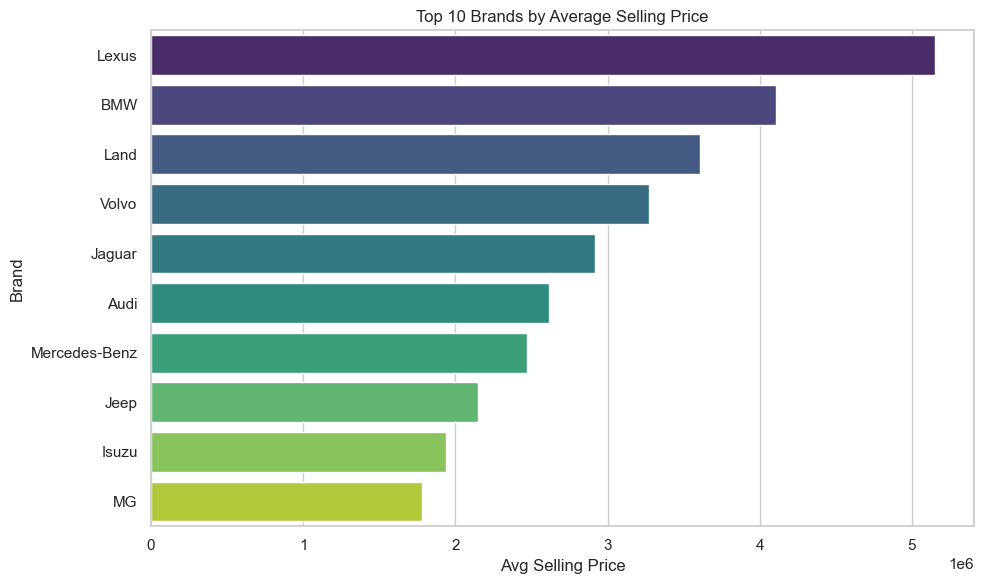

In [129]:

top_10_brands = avg_price_by_brand_df.head(10)

sns.barplot(data=top_10_brands,x='avg_selling_price',y='brand',palette='viridis',hue='brand',legend = False)
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Avg Selling Price')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


### 2. Yearly Price Trend (How Car Prices Change Over Time)

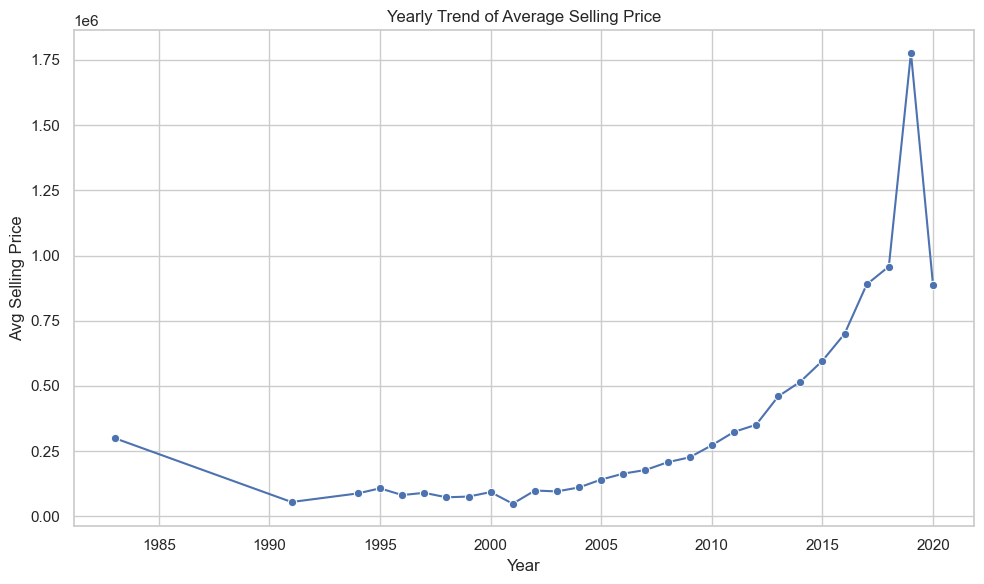

In [125]:

sns.lineplot(data=yearly_price_trend_df, x='year', y='avg_selling_price', marker='o')
plt.title('Yearly Trend of Average Selling Price')
plt.xlabel('Year')
plt.ylabel('Avg Selling Price')
plt.tight_layout()
plt.show()


### 3. Price Distribution by Fuel Type (Boxplot)

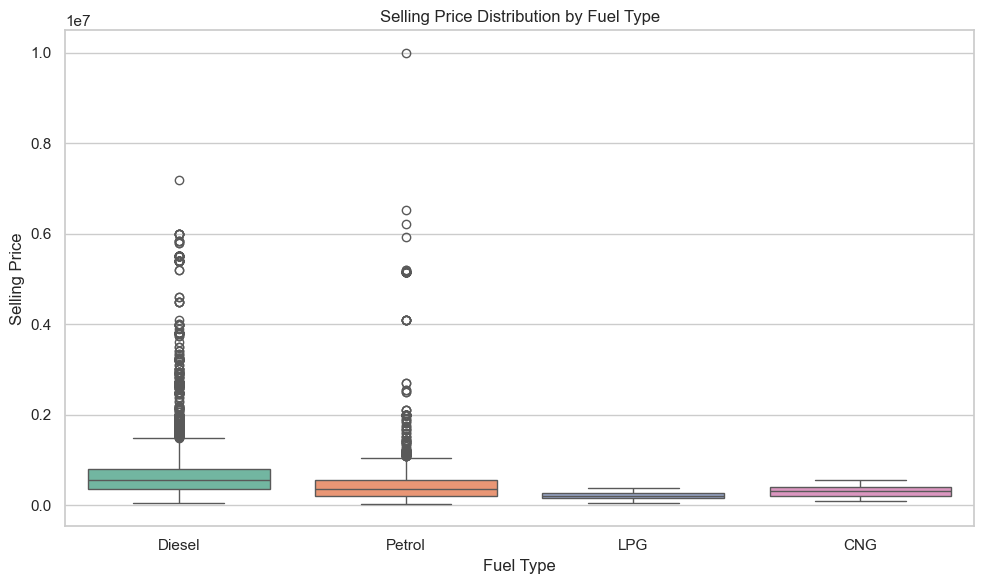

In [128]:

sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2',hue = "fuel", legend = False)
plt.title('Selling Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


### 4. Count of Cars by Owner Type (Bar Chart)

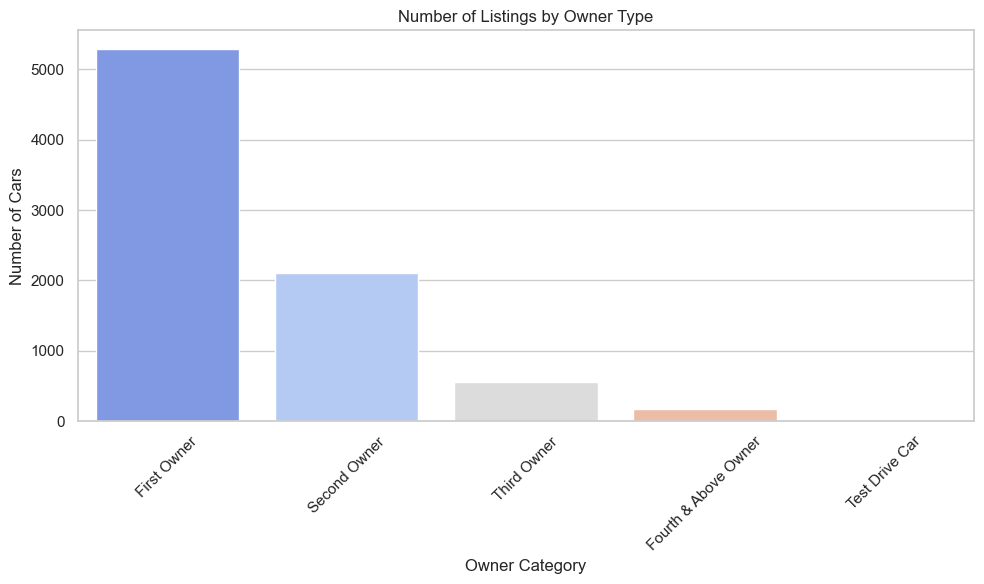

In [137]:

sns.barplot(data=owner_counts_df, x='owner', y='count', palette='coolwarm', hue='owner', legend=False)
plt.title('Number of Listings by Owner Type')
plt.xlabel('Owner Category')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. Mileage vs Selling Price

C:\Users\nivya\AppData\Local\Temp\ipykernel_4904\242475838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price_df = df.groupby('mileage_bin')['selling_price'].mean().reset_index()


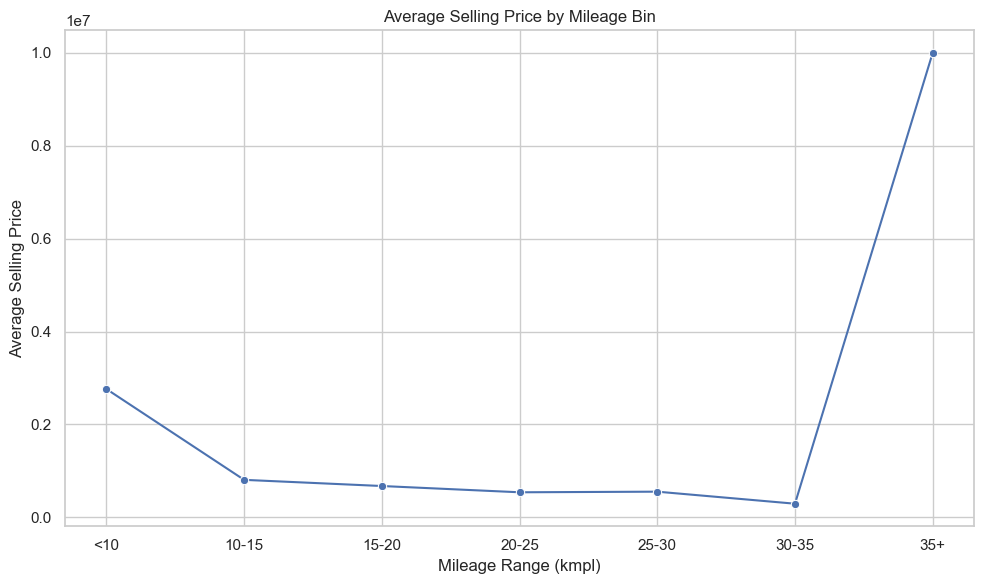

In [142]:
mileage_price_df = df.groupby('mileage_bin')['selling_price'].mean().reset_index()

sns.lineplot(data=mileage_price_df, x='mileage_bin', y='selling_price', marker='o')
plt.title('Average Selling Price by Mileage Bin')
plt.xlabel('Mileage Range (kmpl)')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()


<div style="border: 1.5px solid #ccc; border-radius: 12px; padding: 20px;">

# ✅ Conclusion

---

## 🔁 End-to-End Journey

In this project, we conducted a comprehensive analysis of a **second-hand car dataset** to extract valuable business insights and demonstrate advanced **data analytics skills** using `Python`, `Pandas`, and data visualization tools.

**The workflow included:**

- 🧼 **Data Cleaning & Preprocessing**  
  - Handled missing values with smart inference and feature engineering  
  - Converted textual data (`mileage`, `engine`, `max_power`) into numeric formats  
  - Extracted brand names and categorized car age as `Old`, `Mid`, and `New`

- 🔍 **Exploratory Data Analysis (EDA)**  
  - Designed and answered **13 real-world business questions** using advanced `Pandas` querying  
  - Delivered valuable insights around **price trends**, **fuel types**, **engine impact**, and more

- 📊 **Visualizations**  
  - Created **5 impactful visualizations** to present key findings clearly and effectively

---

## 💡 Key Business Insights

1. 💰 **High-end brands** like *Mercedes-Benz* and *Audi* command significantly higher resale values  
2. ⛽ **Petrol** is the most common fuel, but **diesel cars** offer better mileage on average  
3. ⚙️ **Manual transmission** cars dominate and tend to be more fuel-efficient  
4. 📉 **Car depreciation** is steep for older vehicles — especially pre-2012 models  
5. 👤 **First-owner cars** retain better value — resale price drops with each new owner  
6. 🔁 **Kilometers driven** moderately affects price — especially when paired with brand and year  
7. 🪑 **5-seaters** are the most popular configuration, appealing to the family segment

---

## 📊 Visual Summary

### 1. 📊 **Bar Plot: Average Selling Price by Brand**  
> Highlights which brands have the highest resale value — useful for targeting profitable listings.

### 2. 🥧 **Line Chart: Yearly Price Trend**  
> Shows price trend over years

### 3. 📉 **Box Plot: Price Distribution by Fuel Type**  
> Illustrates the price factor variations on the basis of fuel type - petrol, CNG, diesel.

### 4. 📦 **Bar Plot: Count of Cars by Owner Type **  
> Shows the influence of owner type - (first, second, third owners)

### 5. ⚙️ **Line Plot: Mileage vs Selling Price**  
> Explores relationship between mileage and pricing — relevant for economical-based buying.

---

## 🚀 Final Note

This project highlights both **technical expertise** and **business insights**:

- ✅ Strong command over **Pandas** for data transformation and querying  
- ✅ Effective **data cleaning & preprocessing** strategies  
- ✅ Real-world **business insights** for pricing, customer targeting, and inventory planning  
- ✅ Clear and concise **data storytelling** with impactful visualizations  

This is a solid example of how **data analytics can drive smarter decisions** in the used car industry.

---
